## Double Pendulum

In [27]:
using TrajectoryOptimization
using Plots, LinearAlgebra, MeshCat, MeshCatMechanisms, RigidBodyDynamics, GeometryTypes, CoordinateTransformations

Get path to urdf file

In [24]:
traj_folder = joinpath(dirname(pathof(TrajectoryOptimization)),"..")
urdf_folder = joinpath(traj_folder, "dynamics/urdf")
urdf = joinpath(urdf_folder, "doublependulum.urdf");

Create model from urdf

In [25]:
model = Model(urdf);
n = model.n
m = model.m;

Define numerical type

In [4]:
T = Float64;

Define initial and goal states

In [5]:
x0 = [0.0;0.0;0.0;0.0]
xf = [π;0.0;0.0;0.0];

Define a cost function

In [6]:
Qf = 100.0*Diagonal(I,n)
Q = (1e-2)*Diagonal(I,n)
R = (1e-2)*Diagonal(I,m)
cost = LQRCost(Q,R,Qf,xf);

Create problem

In [56]:
N = 101
U = [ones(m) for k = 1:N-1]
dt = 0.01
obj = Objective(cost,N)

prob = Problem(model,Objective(cost,N),x0=x0,N=N,dt=dt)
initial_controls!(prob, U);

Solve problem

In [57]:
solve!(prob, TrajectoryOptimization.iLQRSolverOptions(verbose=true)) # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     51.080141322  463.076541  0.914831  1         0e+00     423.637   11.18941 0          
    2     14.351072876  29.8702711  1.22962   0.5       0e+00     36.72907  6.01584  0          
    3     5.3732070349  9.78729977  0.917298  0.5       0e+00     8.977866  5.97122  0          
    4     2.0935725125  3.34975812  0.979066  1         0e+00     3.279635  3.888528 0          
    5     2.0309475077  0.0670676   0.933759  1         0e+00     0.062625  0.363024 0          
    6     2.0285236064  0.00332989  0.727922  1         0e+00     0.002424  0.110085 0          
    7     2.0282930648  0.00039239  0.587529  1         0e+00     0.000231  0.048644 0          
    8     2.0282494191  0.0

2.0282494190509

Plot state trajectory

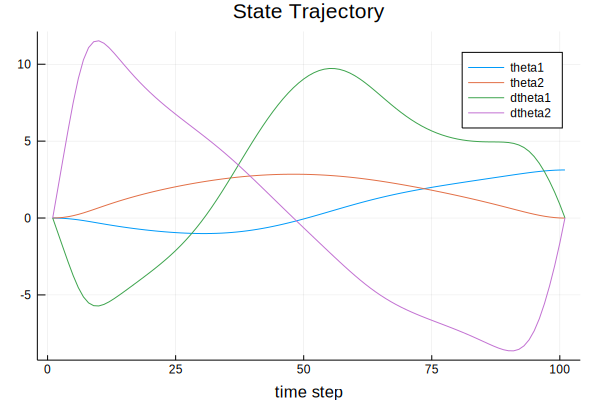

In [58]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["theta1" "theta2" "dtheta1" "dtheta2"])

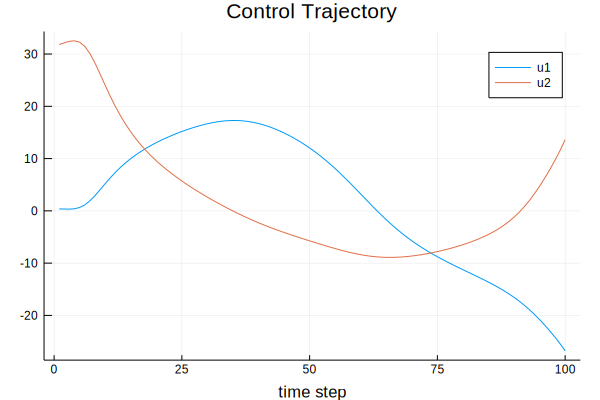

In [59]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label=["u1" "u2"])

Visualizer

In [18]:
vis = Visualizer()
# open(vis)
IJuliaCell(vis)

WebIO.Scope("scope-29bfe614-176b-4b5a-b9c0-cf3a9cc1e44c", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/39091d6b9eb892b592bedf9cea6c288f61f7d3f3-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-811fcc65-140e-41b1-ba7b-07809c0b1f5c&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-811fcc65-140e-41b1-ba7b-07809c0b1f5c&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&quot;nodeType&quot;:&quot;DOM&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;namespace&quot;:&quot;html&quot;,&quot;tag&quot;:&quot;div&quot;},&quot;children&quot;:[]}]})</unsafe-script>\" + \"</body></html>\";\n        setTimeout(function () { resizeIframe() }, 0)\n    }\n\n    doc.body.appendChild(webio)\n}"), JSString("(function (){retur

Create mechanism

In [28]:
robot = RigidBodyDynamics.parse_urdf(T, urdf)
mvis = MechanismVisualizer(robot, URDFVisuals(urdf), vis);

In [68]:
# Set camera location
settransform!(vis["/Cameras/default"], compose(Translation(0.,1.0,1.0),LinearMap(RotZ(pi/2))));

Create generalized coordinate trajectory and animate

In [60]:
q = [[prob.X[k][1];prob.X[k][2]] for k = 1:N]
t = range(0,stop=N*dt,length=N)

setanimation!(mvis,t,q)